### 1. Understanding Current Working Directory
-Check you wotking directory

-Always verify your working directory at the start

-Set up proper project structure from the beginning

project/

├── notebooks/

│   └── analysis.ipynb

├── data/

│   ├── raw/

│   └── processed/

├── src/

│   └── utils.py

└── config/


In [15]:
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

# List files in current directory
print("Files in current directory:", os.listdir('.'))

Current Working Directory: c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning
Files in current directory: ['.venv', 'adult-census.csv', 'Decision Trees and Random Forest Project .ipynb', 'Decision Trees.ipynb', 'decision_tree_regression.py', 'drug200.csv', 'e2e_MachineLearning', 'ensemble_random_forest.ipynb', 'factor_analysis.ipynb', 'ffib.ipynb', 'fiib1.ipynb', 'fiib3.ipynb', 'Housing.csv', 'iris.csv', 'LDA.ipynb', 'lda.py', 'logistics.csv', 'MLP_22.10.ipynb', 'MLP_23.10.ipynb', 'penguins_regression.csv', 'pivottablejs.html', 'Position_Salaries.csv', 'requirement.txt', 'ShopSellData.csv', 'StoreSalesData.csv', 'tennis.csv', 'tranfromed_data.csv', 'trees_regression.ipynb', 'Wine.csv', 'wokshop.ipynb', 'Workshop']


### 2. Change working Directory

In [16]:
import os
"""
# Change to specific directory
os.chdir('/path/to/your/desired/directory')- write your path of the directory

# Change to parent directory
os.chdir('..')

# Change to subdirectory
os.chdir('data')
"""

"\n# Change to specific directory\nos.chdir('/path/to/your/desired/directory')- write your path of the directory\n\n# Change to parent directory\nos.chdir('..')\n\n# Change to subdirectory\nos.chdir('data')\n"

### 3. Import Required Modules/Packages

#### Best Practices 
1. Always use virtual environments

2. Pin major versions in production

3. Use requirements.txt with version constraints

4. Test compatibility before major upgrades

5. Keep GPU drivers and CUDA toolkit updated

6. Use dependency resolution tools (pip-tools, poetry)

7. Document known compatibility issues

8. Use try-except blocks for optional dependencies

9. Regularly update security patches

10. Maintain separate environments for different projects

In [17]:
# for handling data and dataframe
import pandas as pd
import numpy as np
# Graphical representation of the data
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing modules
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
# Machine Learning modules
# data split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Model output metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [18]:
# read data
data = pd.read_csv('Housing.csv')

In [19]:
# check for few row items
data.head()
data.tail()


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,91500,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000,6000,3,2,2,yes,yes,no,no,yes,1,no
545,105000,6000,3,1,2,yes,no,no,no,yes,1,no


In [20]:
# drop unwanted columns
#data= data.drop('rownames', axis=1)
#data

In [21]:
# check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


In [22]:
# check missing values
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [23]:
# check data statistics
data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


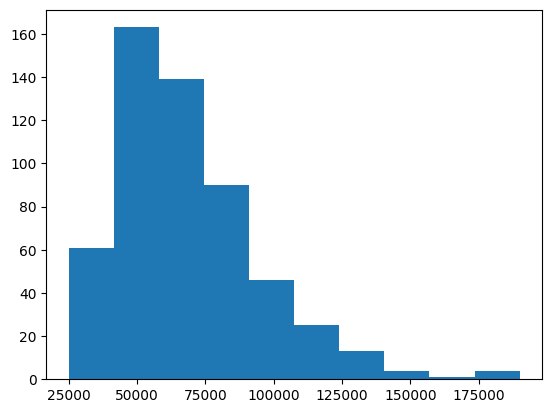

In [24]:
# check Target Distribution
plt.hist(data['price'])
plt.show()

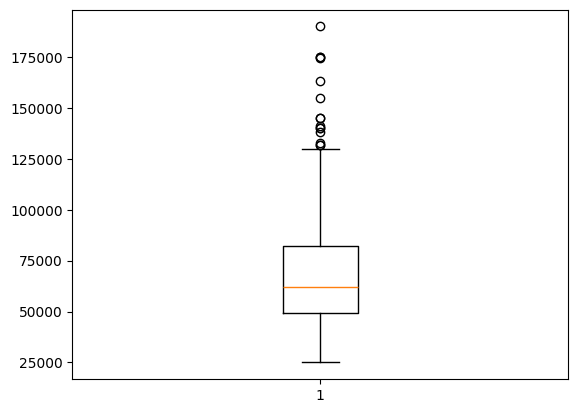

In [25]:
# check for outliers
plt.boxplot(data['price'])
plt.show()

In [26]:
# data preprocessing
lb = LabelBinarizer()
le = LabelEncoder()
ohe = OneHotEncoder() 


In [27]:
#Check for unique items in catgorical variable
unique= {col:data[col].unique() for col in data.columns}
unique_df= pd.DataFrame(list(unique.items()))
unique_df

,0,1
0,price,"[42000, 38500, 49500, 60500, 61000, 66000, 690..."
1,lotsize,"[5850, 4000, 3060, 6650, 6360, 4160, 3880, 480..."
2,bedrooms,"[3, 2, 4, 1, 5, 6]"
3,bathrms,"[1, 2, 3, 4]"
4,stories,"[2, 1, 3, 4]"
5,driveway,"[yes, no]"
6,recroom,"[no, yes]"
7,fullbase,"[yes, no]"
8,gashw,"[no, yes]"
9,airco,"[no, yes]"


In [28]:
# check data columns name
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [29]:
# transform categorical data
data['driveway']= lb.fit_transform(data['driveway'])
data['recroom'] = le.fit_transform(data['recroom'])

In [30]:
# transform categorical data via loop
le_columns= ['fullbase', 'gashw', 'airco',  'prefarea']
for col in le_columns:
    data[col]= le.fit_transform(data[col])

In [32]:
# transform stories variable via OneHotEncoding 
onehotencoding = ohe.fit_transform(data[['stories']]).toarray()
onehotencoding= pd.DataFrame(onehotencoding)
onehotencoding = onehotencoding.rename(columns={0: 'stories_1', 1: 'storeis_2', 2: 'stories_3', 3: 'stories_4'})

In [33]:
# join with original daat
data = data.join(onehotencoding)
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_1,storeis_2,stories_3,stories_4
0,42000,5850,3,1,2,1,0,1,0,0,1,0,0.0,1.0,0.0,0.0
1,38500,4000,2,1,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0
2,49500,3060,3,1,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0
3,60500,6650,3,1,2,1,1,0,0,0,0,0,0.0,1.0,0.0,0.0
4,61000,6360,2,1,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0


In [ ]:
# drop unwated column
data.drop('stories', axis=1, inplace= True)

In [36]:
# check for outlier
Q1= np.percentile(data['price'], 25)
print(Q1)
Q3= np.percentile(data['price'], 75)
print(Q3)
IQR= Q3-Q1
print(IQR)
upper_limit= Q3+1.5*IQR
lower_limit= Q1-1.5*IQR
print(upper_limit, lower_limit)
upper_arrary= np.where(data['price']>= upper_limit)
print(upper_arrary)
print(data['price'][92])



49125.0
82000.0
32875.0
131312.5 -187.5
(array([ 92, 103, 216, 331, 337, 338, 361, 362, 368, 375, 376, 377, 382,
       418, 436], dtype=int64),)
163000


In [42]:
# Take out Y
y= data['price']
print(y)
# Take out X's
X= data.loc[:, data.columns != 'price']
print(X.head())

0       42000
1       38500
2       49500
3       60500
4       61000
        ...  
541     91500
542     94000
543    103000
544    105000
545    105000
Name: price, Length: 546, dtype: int64
   lotsize  bedrooms  bathrms  stories  driveway  recroom  fullbase  gashw  \
0     5850         3        1        2         1        0         1      0   
1     4000         2        1        1         1        0         0      0   
2     3060         3        1        1         1        0         0      0   
3     6650         3        1        2         1        1         0      0   
4     6360         2        1        1         1        0         0      0   

   airco  garagepl  prefarea  stories_1  storeis_2  stories_3  stories_4  
0      0         1         0        0.0        1.0        0.0        0.0  
1      0         0         0        1.0        0.0        0.0        0.0  
2      0         0         0        1.0        0.0        0.0        0.0  
3      0         0         0        0.

In [44]:
# check for correlation
corr= X.corr()
print(corr)

            lotsize  bedrooms   bathrms   stories  driveway   recroom  \
lotsize    1.000000  0.151851  0.193833  0.083675  0.288778  0.140327   
bedrooms   0.151851  1.000000  0.373769  0.407974 -0.011996  0.080492   
bathrms    0.193833  0.373769  1.000000  0.324066  0.041955  0.126892   
stories    0.083675  0.407974  0.324066  1.000000  0.122499  0.042281   
driveway   0.288778 -0.011996  0.041955  0.122499  1.000000  0.091959   
recroom    0.140327  0.080492  0.126892  0.042281  0.091959  1.000000   
fullbase   0.047487  0.097201  0.102791 -0.173860  0.043428  0.372434   
gashw     -0.009201  0.046028  0.067365  0.018261 -0.011942 -0.010119   
airco      0.221765  0.160412  0.184955  0.296216  0.106290  0.136626   
garagepl   0.352872  0.139117  0.178178  0.043412  0.203682  0.038122   
prefarea   0.234782  0.078953  0.064013  0.042940  0.199378  0.161292   
stories_1  0.054348 -0.509974 -0.250784 -0.785490 -0.053249 -0.022632   
storeis_2 -0.159612  0.377424  0.080982  0.194889 -

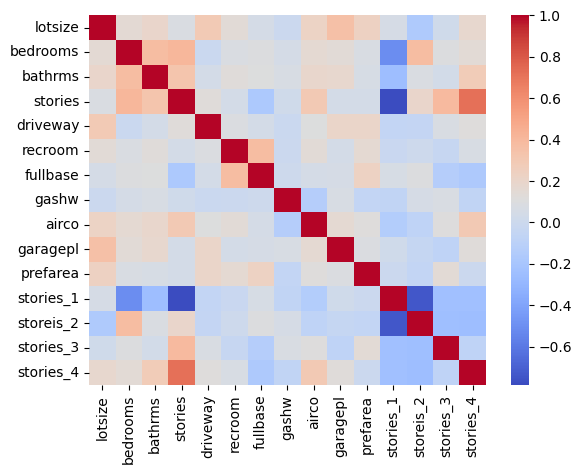

In [47]:
# visulaize correlation
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
#check for multicollinearity
vif_dataframe = pd.DataFrame()
vif_dataframe['features'] = X.columns
vif_dataframe['vif']= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_dataframe)

     features       vif
0     lotsize  1.370474
1    bedrooms  1.578327
2     bathrms  1.298778
3     stories       inf
4    driveway  1.164881
5     recroom  1.214862
6    fullbase  1.336911
7       gashw  1.053079
8       airco  1.219582
9    garagepl  1.218833
10   prefarea  1.181239
11  stories_1       inf
12  storeis_2       inf
13  stories_3       inf
14  stories_4       inf


c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [52]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, random_state=1) 

In [53]:
# Filt model
lm= sm.OLS(y_train, X_train).fit()

In [54]:
# print model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     70.62
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           3.77e-97
Time:                        12:50:13   Log-Likelihood:                -4808.6
No. Observations:                 436   AIC:                             9645.
Df Residuals:                     422   BIC:                             9702.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize        3.0899      0.406      7.602      0.0

In [55]:
# make prediction
y_train_pred = lm.predict(X_train)
print(y_train_pred)

273     65930.925741
40      53747.818351
397     97326.015708
339     48952.987122
411    104397.285813
           ...      
129     91232.406585
144     60353.206486
72      32631.970767
235     49660.541092
37      80046.734745
Length: 436, dtype: float64


In [61]:
# check for metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae= mean_absolute_error(y_train, y_train_pred)
print ('MAE', mae)
rmse= np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE', rmse)
r_2= r2_score(y_train, y_train_pred)
print('R_squared', r_2)

MAE 11194.812606491
RMSE 14913.171921672718
R_squared 0.6851026834699139


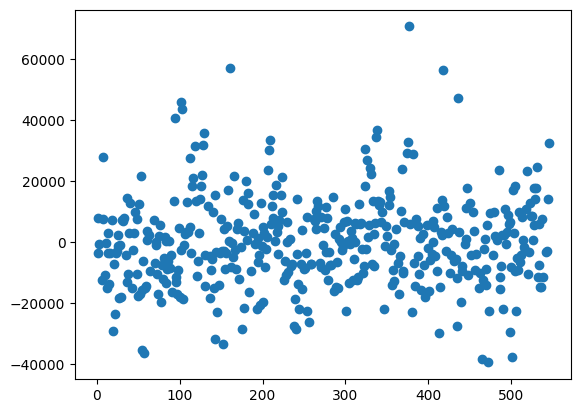

In [62]:
# check for Volatility
plt.plot(lm.resid, 'o')
plt.show()

c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\statsmodels\graphics\reg

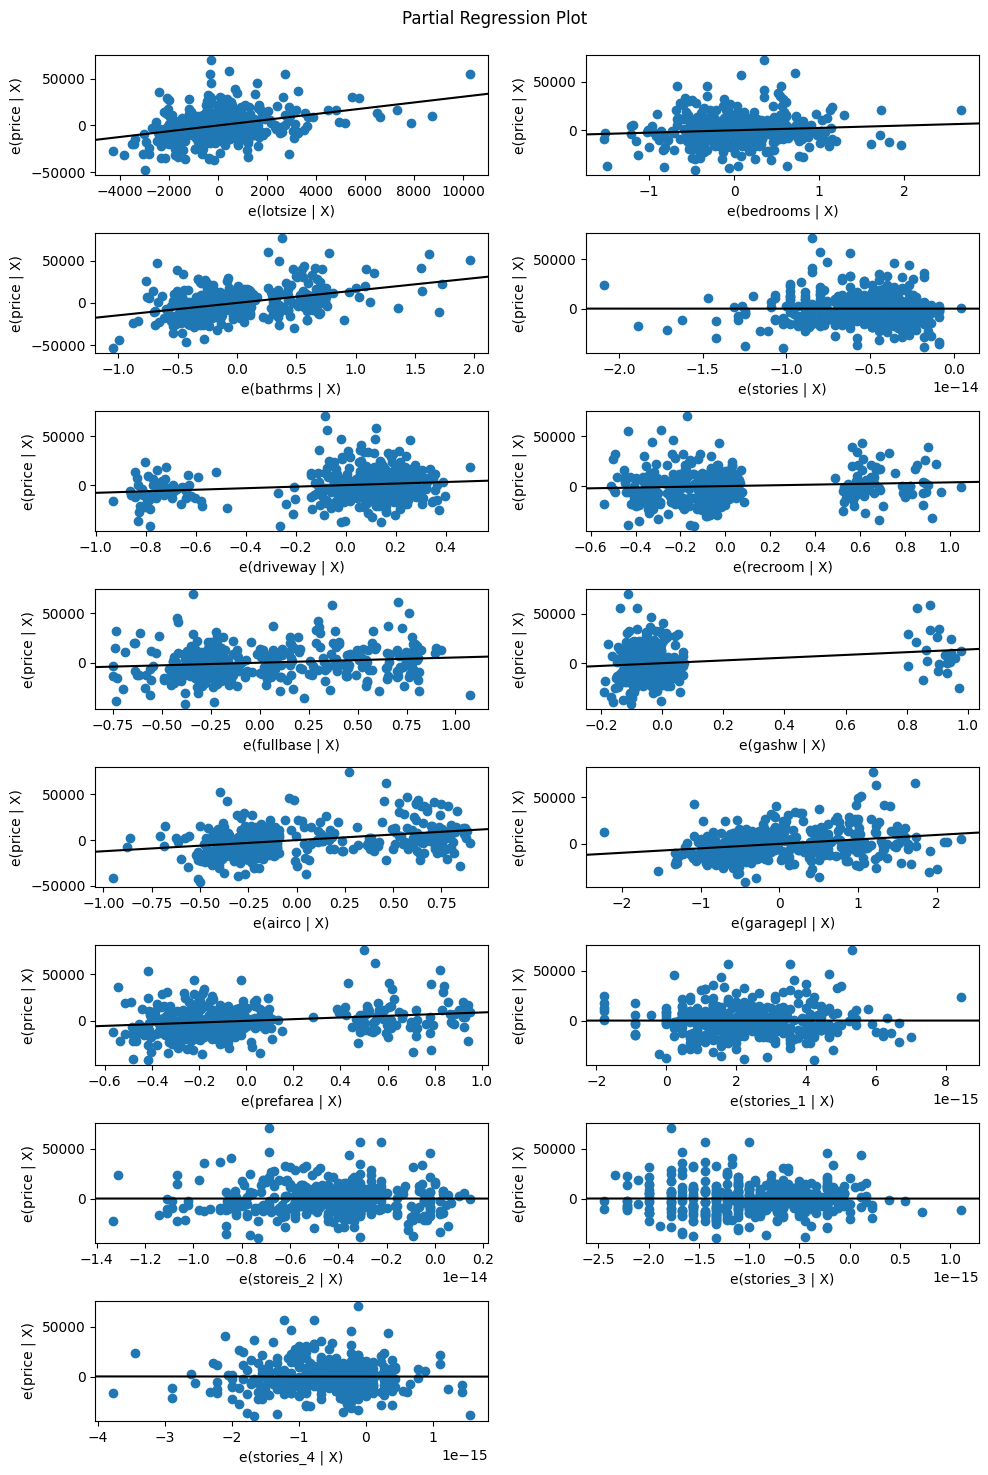

In [ ]:
# check for linearity
fig= plt.figure(figsize=(10,15))
fig= sm.graphics.plot_partregress_grid(lm, fig=fig)
plt.show()

In [ ]:
data['price'].mean()

68121.59706959708

In [ ]:
data['class']= data['price'].apply(lambda x: 1 if (x>=68121) else 0)

In [ ]:
data

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_1,storeis_2,stories_3,stories_4,class
0,42000,5850,3,1,1,0,1,0,0,1,0,0.0,1.0,0.0,0.0,0
1,38500,4000,2,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
2,49500,3060,3,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
3,60500,6650,3,1,1,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0
4,61000,6360,2,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,1,1,0,0,1,0,0,0.0,0.0,0.0,1.0,1
542,94000,6000,3,2,1,0,0,0,1,0,0,0.0,0.0,0.0,1.0,1
543,103000,6000,3,2,1,1,0,0,1,1,0,0.0,0.0,0.0,1.0,1
544,105000,6000,3,2,1,1,0,0,1,1,0,0.0,1.0,0.0,0.0,1


In [ ]:
data_l= data.drop('price', axis=1)

In [ ]:
data_l.to_csv('logistics.csv')

In [ ]:
y_l= data['class']

In [ ]:
y_l

0      0
1      0
2      0
3      0
4      0
      ..
541    1
542    1
543    1
544    1
545    1
Name: class, Length: 546, dtype: int64

In [ ]:
X_l= data_l.loc[:,  data_l.columns != 'class']

In [ ]:
X_l

,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_1,storeis_2,stories_3,stories_4
0,5850,3,1,1,0,1,0,0,1,0,0.0,1.0,0.0,0.0
1,4000,2,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0
2,3060,3,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0
3,6650,3,1,1,1,0,0,0,0,0,0.0,1.0,0.0,0.0
4,6360,2,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,1,1,0,0,1,0,0,0.0,0.0,0.0,1.0
542,6000,3,2,1,0,0,0,1,0,0,0.0,0.0,0.0,1.0
543,6000,3,2,1,1,0,0,1,1,0,0.0,0.0,0.0,1.0
544,6000,3,2,1,1,0,0,1,1,0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, y_l, train_size=0.80, random_state=5)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg= LogisticRegression(max_iter=1000)

In [ ]:
logreg.fit(X_l_train, y_l_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_l_pred= logreg.predict(X_l_test)

In [ ]:
y_l_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [ ]:
from sklearn import metrics

In [ ]:
cnfmatric= metrics.confusion_matrix(y_l_test, y_l_pred )

In [ ]:
cnfmatric

array([[57,  9],
       [ 9, 35]], dtype=int64)

In [ ]:
accuracy= metrics.accuracy_score(y_l_test, y_l_pred )

In [ ]:
accuracy

0.8363636363636363

In [ ]:
f_1_score= metrics.f1_score(y_l_test, y_l_pred)

In [ ]:
f_1_score

0.7954545454545455

In [ ]:
data

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_1,storeis_2,stories_3,stories_4,class
0,42000,5850,3,1,1,0,1,0,0,1,0,0.0,1.0,0.0,0.0,0
1,38500,4000,2,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
2,49500,3060,3,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
3,60500,6650,3,1,1,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0
4,61000,6360,2,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,1,1,0,0,1,0,0,0.0,0.0,0.0,1.0,1
542,94000,6000,3,2,1,0,0,0,1,0,0,0.0,0.0,0.0,1.0,1
543,103000,6000,3,2,1,1,0,0,1,1,0,0.0,0.0,0.0,1.0,1
544,105000,6000,3,2,1,1,0,0,1,1,0,0.0,1.0,0.0,0.0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss= StandardScaler()

In [ ]:
data= ss.fit_transform(data)

In [ ]:
data

array([[-0.97913617,  0.32302806,  0.0472349 , ..., -0.28116078,
        -0.28493529, -0.82775913],
       [-1.11032939, -0.53101296, -1.31014696, ..., -0.28116078,
        -0.28493529, -0.82775913],
       [-0.69800783, -0.96495812,  0.0472349 , ..., -0.28116078,
        -0.28493529, -0.82775913],
       ...,
       [ 1.30737434,  0.39227462,  0.0472349 , ..., -0.28116078,
         3.5095688 ,  1.2080809 ],
       [ 1.3823419 ,  0.39227462,  0.0472349 , ..., -0.28116078,
        -0.28493529,  1.2080809 ],
       [ 1.3823419 ,  0.39227462,  0.0472349 , ..., -0.28116078,
        -0.28493529,  1.2080809 ]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=41)

In [ ]:
kmeans_= kmeans.fit_predict(data)

c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
kmeans_

array([0, 2, 2, 0, 2, 2, 0, 0, 1, 3, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 3, 1, 2, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1,
       2, 2, 2, 0, 1, 3, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0,
       0, 2, 2, 3, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,

In [ ]:
clu_pred= pd.DataFrame(kmeans_)

In [ ]:
clu_pred

,0
0,0
1,2
2,2
3,0
4,2
...,...
541,3
542,3
543,3
544,1


In [ ]:
clu_data= pd.read_csv('Housing.csv')

In [ ]:
clu_data= clu_data.join(clu_pred)

In [ ]:
clu_data

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,0
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no,0
1,38500,4000,2,1,1,yes,no,no,no,no,0,no,2
2,49500,3060,3,1,1,yes,no,no,no,no,0,no,2
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no,0
4,61000,6360,2,1,1,yes,no,no,no,no,0,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,yes,yes,no,no,yes,0,no,3
542,94000,6000,3,2,4,yes,no,no,no,yes,0,no,3
543,103000,6000,3,2,4,yes,yes,no,no,yes,1,no,3
544,105000,6000,3,2,2,yes,yes,no,no,yes,1,no,1


In [ ]:
wcss= []

In [ ]:
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state=41)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\OneDrive - adeewies\Machine Learning\e2e_Machine_Learning\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\L

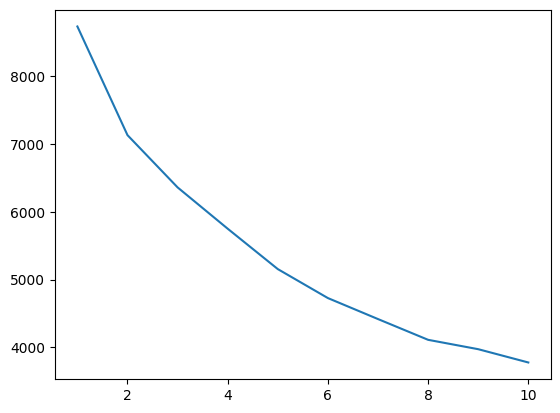

In [ ]:
plt.plot(range(1,11), wcss)
plt.show()

In [ ]:
data

array([[-0.97913617,  0.32302806,  0.0472349 , ..., -0.28116078,
        -0.28493529, -0.82775913],
       [-1.11032939, -0.53101296, -1.31014696, ..., -0.28116078,
        -0.28493529, -0.82775913],
       [-0.69800783, -0.96495812,  0.0472349 , ..., -0.28116078,
        -0.28493529, -0.82775913],
       ...,
       [ 1.30737434,  0.39227462,  0.0472349 , ..., -0.28116078,
         3.5095688 ,  1.2080809 ],
       [ 1.3823419 ,  0.39227462,  0.0472349 , ..., -0.28116078,
        -0.28493529,  1.2080809 ],
       [ 1.3823419 ,  0.39227462,  0.0472349 , ..., -0.28116078,
        -0.28493529,  1.2080809 ]])

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(data[:, 0], data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

ValueError: X has 2 features, but KMeans is expecting 16 features as input.

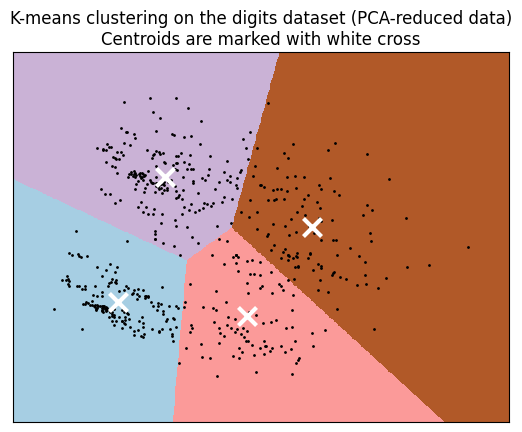

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
X = credit_approval.data.features 
y = credit_approval.data.targets 
  
# metadata 
print(credit_approval.metadata) 
  
# variable information 
print(credit_approval.variables) 


{'uci_id': 27, 'name': 'Credit Approval', 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv', 'abstract': 'This data concerns credit card applications; good mix of attributes', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 15, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A16'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C5FS30', 'creators': ['J. R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good mix of attributes --

In [ ]:
X

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.00,30.83,b
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.46,58.67,a
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.50,24.50,a
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.54,27.83,b
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.62,20.17,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,260.0,g,f,0,f,f,1.25,h,e,p,y,10.09,21.08,b
686,394,200.0,g,t,2,t,f,2.00,v,c,g,u,0.75,22.67,a
687,1,200.0,g,t,1,t,f,2.00,ff,ff,p,y,13.50,25.25,a
688,750,280.0,g,f,0,f,f,0.04,v,aa,g,u,0.20,17.92,b


In [ ]:
y

,A16
0,+
1,+
2,+
3,+
4,+
...,...
685,-
686,-
687,-
688,-


In [ ]:
unique= {col:X[col].unique() for col in X.columns}

In [ ]:
unique_df= pd.DataFrame(list(unique.items()))

In [ ]:
unique_df

,0,1
0,A15,"[0, 560, 824, 3, 31285, 1349, 314, 1442, 200, ..."
1,A14,"[202.0, 43.0, 280.0, 100.0, 120.0, 360.0, 164...."
2,A13,"[g, s, p]"
3,A12,"[f, t]"
4,A11,"[1, 6, 0, 5, 7, 10, 3, 17, 2, 9, 8, 15, 11, 12..."
5,A10,"[t, f]"
6,A9,"[t, f]"
7,A8,"[1.25, 3.04, 1.5, 3.75, 1.71, 2.5, 6.5, 0.04, ..."
8,A7,"[v, h, bb, ff, j, z, nan, o, dd, n]"
9,A6,"[w, q, m, r, cc, k, c, d, x, i, e, aa, ff, j, ..."
